In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import multiprocessing as mp
import numpy as np
import pandas as pd
import ctypes


In [2]:
# Define a stock list
stocks_list = ['AAPL', 'FB', 'NFLX', 'GOOG']
metrics_list=['Ann_Returns', 'Ann_Variance','Final_Return','Sharpe_Ratio','RiskContr_SSE','Geom_Rets']
N=4000
# Define number of stocks
no_of_stocks = len(stocks_list)
trading_days = 252

import yfinance as yf
stocks_data = yf.download(stocks_list, start='2015-01-01', end='2020-08-30')['Adj Close']


[*********************100%***********************]  4 of 4 completed


Launching parallelization with 4000 iterations over 4 processes (1000 each)


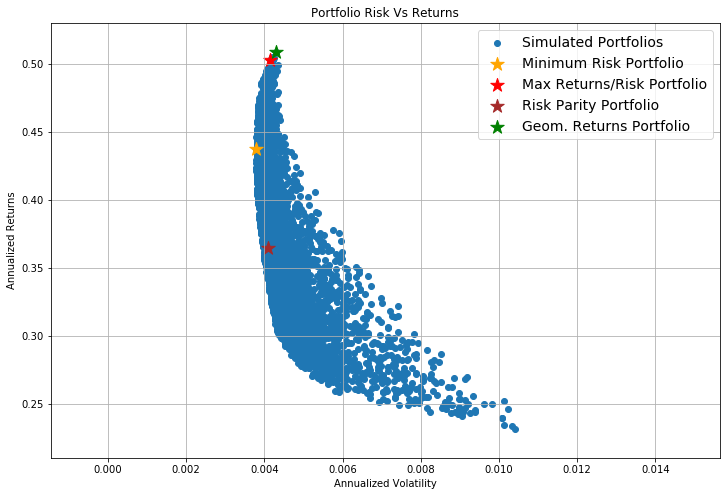

In [3]:
from Plib.Portfolio.Analysis import portfolioSimulation
from Plib.Portfolio.Plots import plotPortfolioOptimization
from Plib.Utils.Tools import parallelExecution1

simfun_args=stocks_data, stocks_list, metrics_list
portfolios=parallelExecution1(N,simfun_args,stocks_list+metrics_list,portfolioSimulation)

plotPortfolioOptimization(portfolios)


In [5]:
portfolios.head(5)

AAPL     FB   NFLX   GOOG  Ann_Returns  Ann_Variance  Final_Return  \
0  0.244  0.078  0.178  0.501     0.321982      0.005500      3.847328   
1  0.389  0.090  0.413  0.109     0.416388      0.003832      6.159786   
2  0.409  0.379  0.076  0.136     0.321555      0.004208      3.838462   
3  0.531  0.148  0.020  0.301     0.303368      0.004611      3.473800   
4  0.068  0.283  0.561  0.088     0.432672      0.004062      6.637871   

   Sharpe_Ratio  RiskContr_SSE  Geom_Rets  
0      4.341523       0.084100   0.321982  
1      6.726207       0.020928   0.416388  
2      4.957100       0.023811   0.321555  
3      4.467360       0.042013   0.303368  
4      6.788710       0.040795   0.432672